# 🏆 Language Comparison & Rankings

**Notebook 2 of 5** | Comparative Analysis

---

## 🎯 Overview

This notebook performs comprehensive comparative analysis of all 12 programming languages, ranking them across multiple dimensions and testing for statistical significance.

### What You'll Discover:
- ✅ Language rankings by overall, popularity, activity, and health scores
- ✅ Statistical significance testing (ANOVA and post-hoc analysis)
- ✅ Visual comparisons through box plots and radar charts
- ✅ Language strengths and weaknesses identification
- ✅ Performance heatmaps and correlation patterns
- ✅ Exportable comparison summary tables

### Expected Output:
Clear, data-driven answers to "Which language is best?" with statistical validation and visual evidence across all key metrics.

---

## 📋 Table of Contents

| Section | Focus Area |
|---------|------------|
| [1. Setup & Data Loading](#setup) | Environment configuration and data import |
| [2. Overall Rankings](#overall) | Comprehensive language rankings |
| [3. Score Component Analysis](#components) | Popularity, activity, and health breakdowns |
| [4. Statistical Testing](#statistics) | ANOVA and significance testing |
| [5. Visual Comparisons](#visualizations) | Box plots, radar charts, and heatmaps |
| [6. Language Profiles](#profiles) | Strengths, weaknesses, and characteristics |
| [7. Summary & Export](#summary) | Key findings and exportable data |

---

<a id="setup"></a>
## 1️⃣ Setup & Data Loading

Let's begin by importing libraries and loading our dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ All libraries imported successfully!")
print("✅ Visualization settings configured!")
print("\n📦 Libraries loaded:")
print("   - pandas (data manipulation)")
print("   - numpy (numerical operations)")
print("   - matplotlib & seaborn (visualizations)")
print("   - scipy.stats (statistical testing)")
print("   - pathlib.Path (file system utilities)")
print("\n🎨 Ready for language comparison!")

✅ All libraries imported successfully!
✅ Visualization settings configured!

📦 Libraries loaded:
   - pandas (data manipulation)
   - numpy (numerical operations)
   - matplotlib & seaborn (visualizations)
   - scipy.stats (statistical testing)
   - pathlib.Path (file system utilities)

🎨 Ready for language comparison!


### 📂 Load Dataset

In [2]:
# Load the dataset
data_file = '../data/raw/repositories_enriched.csv'

try:
    df = pd.read_csv(data_file)
    print(f"✅ Dataset loaded: {df.shape[0]} repositories × {df.shape[1]} columns")
    print(f"📊 Languages: {df['language'].nunique()}")
    print(f"🔢 Repositories per language: {len(df) // df['language'].nunique()}")
    print(f"\n✅ Ready for comparative analysis!")
except FileNotFoundError:
    print("❌ Error: Data file not found!")
    print(f"   Please ensure '{data_file}' exists.")
except Exception as e:
    print(f"❌ Error loading data: {e}")

✅ Dataset loaded: 1200 repositories × 52 columns
📊 Languages: 12
🔢 Repositories per language: 100

✅ Ready for comparative analysis!


---

<a id="overall"></a>
## 2️⃣ Overall Language Rankings

Comprehensive rankings across all scoring dimensions.

In [3]:
# Calculate language rankings
print("🏆 LANGUAGE RANKINGS BY OVERALL SCORE")
print("=" * 90)

# Aggregate scores by language
language_stats = df.groupby('language').agg({
    'overall_score': ['mean', 'std', 'min', 'max'],
    'popularity_score': 'mean',
    'activity_score': 'mean',
    'health_score': 'mean',
    'stars': ['sum', 'mean'],
    'forks': ['sum', 'mean'],
    'contributors_count': 'mean'
}).round(2)

# Flatten column names
language_stats.columns = ['_'.join(col).strip() for col in language_stats.columns.values]
language_stats = language_stats.sort_values('overall_score_mean', ascending=False)

# Display rankings
print(f"\n{'Rank':<6} {'Language':<15} {'Overall':<10} {'Popularity':<12} {'Activity':<10} {'Health':<8}")
print("-" * 90)

for idx, (lang, row) in enumerate(language_stats.iterrows(), 1):
    medal = "🥇" if idx == 1 else "🥈" if idx == 2 else "🥉" if idx == 3 else f"{idx:2d}."
    print(f"{medal:<6} {lang:<15} {row['overall_score_mean']:>8.2f}  "
          f"{row['popularity_score_mean']:>10.2f}  "
          f"{row['activity_score_mean']:>10.2f}  "
          f"{row['health_score_mean']:>7.2f}")

print("\n" + "=" * 90)
print(f"🎯 Rankings Summary:")
print(f"   • Top 3: {', '.join(language_stats.index[:3].tolist())}")
print(f"   • Score range: {language_stats['overall_score_mean'].min():.2f} - {language_stats['overall_score_mean'].max():.2f}")
print(f"   • Score spread: {language_stats['overall_score_mean'].max() - language_stats['overall_score_mean'].min():.2f} points")

🏆 LANGUAGE RANKINGS BY OVERALL SCORE

Rank   Language        Overall    Popularity   Activity   Health  
------------------------------------------------------------------------------------------
🥇      Rust               49.40       27.07       61.62    68.00
🥈      TypeScript         48.33       16.06       69.44    70.40
🥉      Go                 46.92       22.98       58.92    68.40
 4.    C++                44.12       16.30       56.15    71.80
 5.    Python             43.49       20.76       53.52    65.80
 6.    JavaScript         43.31       22.57       47.37    70.80
 7.    Ruby               42.40       21.40       46.98    69.60
 8.    Java               41.45       22.05       46.53    65.40
 9.    Kotlin             38.49       24.67       36.64    63.20
10.    PHP                38.20       19.64       44.43    59.20
11.    Swift              37.43       26.61       29.12    66.40
12.    C#                 36.78       13.71       43.69    64.00

🎯 Rankings Summary:
   

### 📊 Visualize Overall Rankings

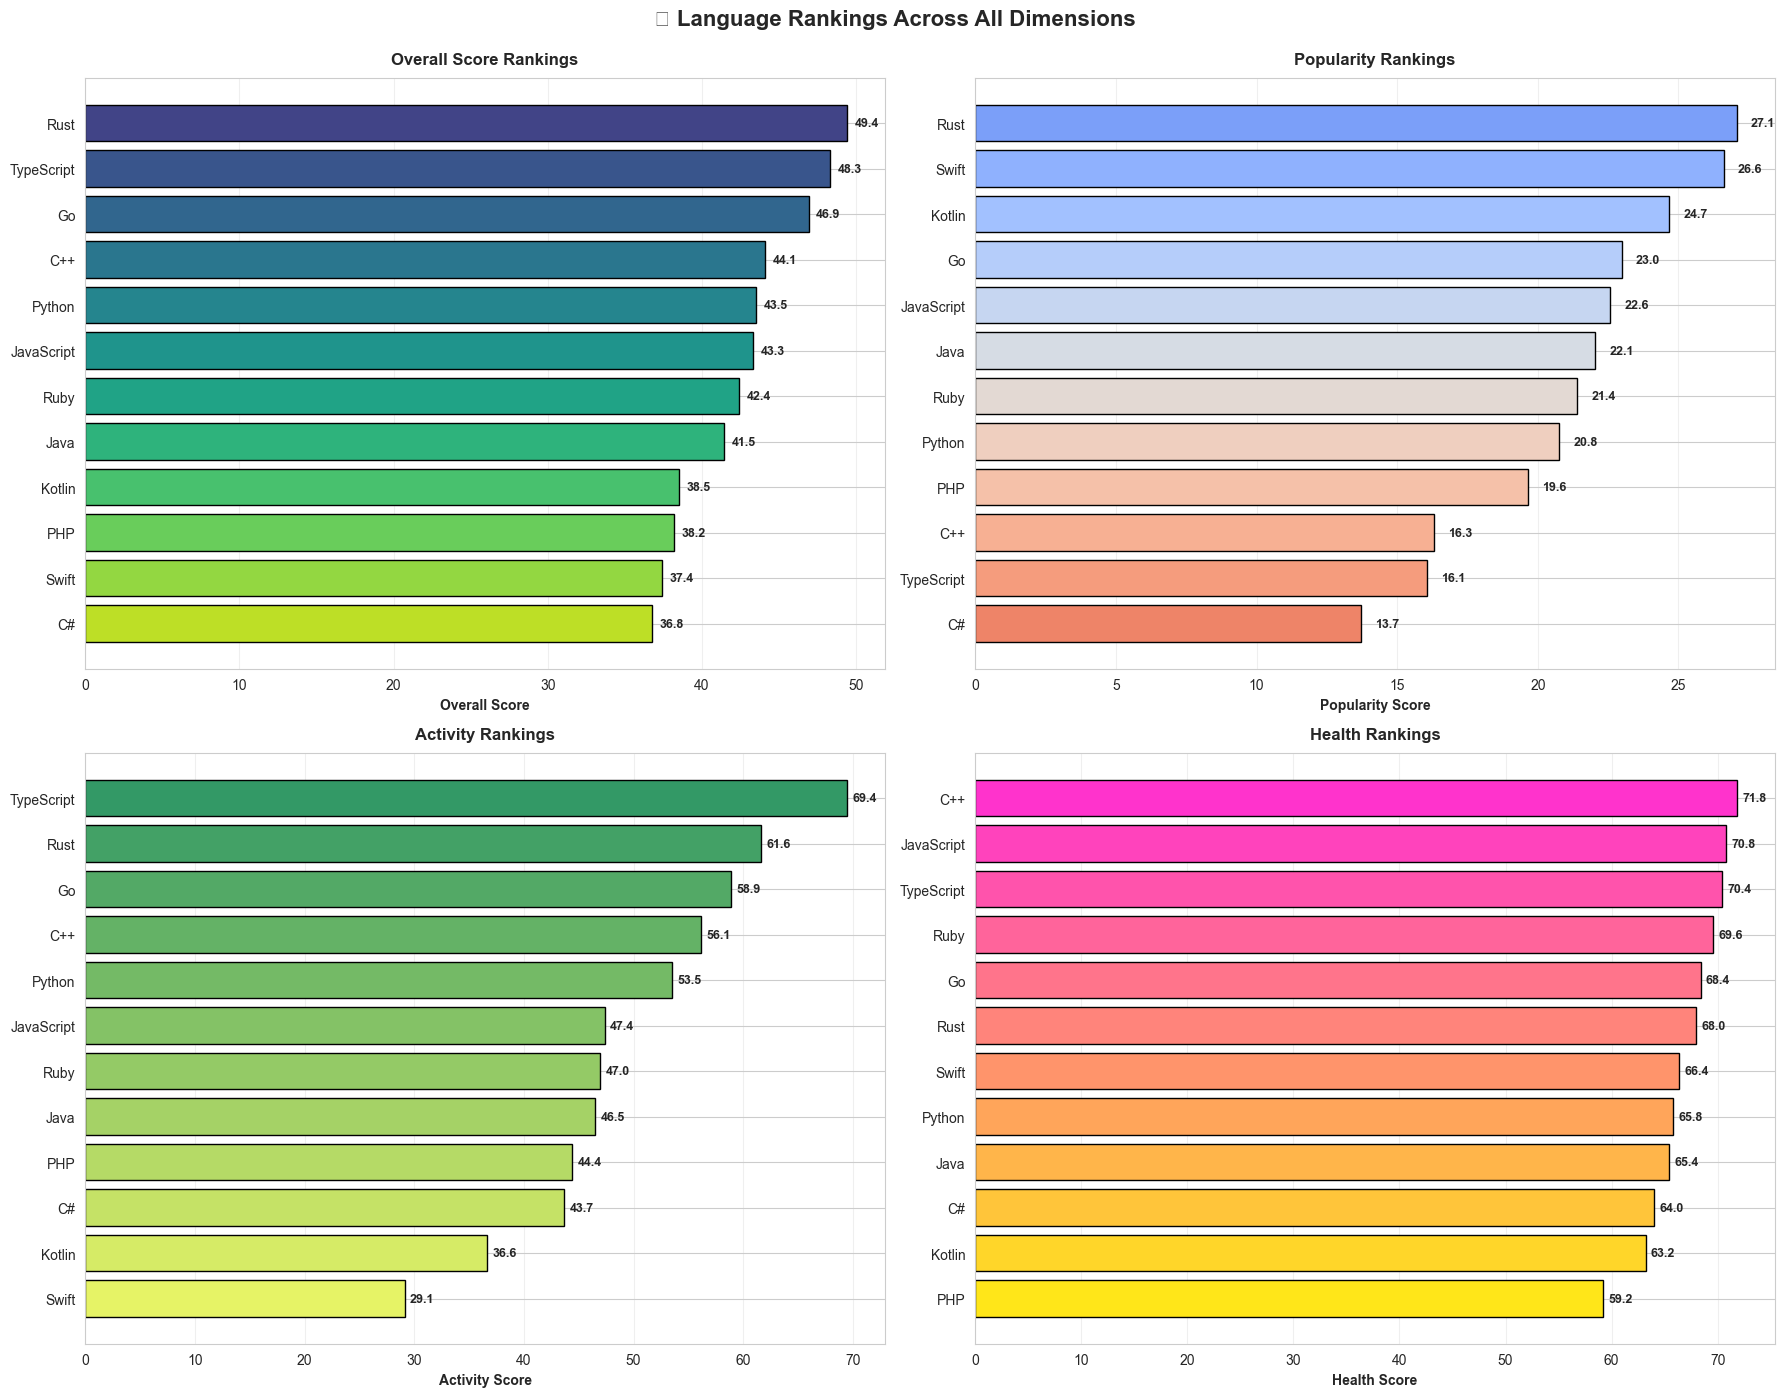


📊 Visualization complete!
💡 Note the different rankings across dimensions - languages excel in different areas


In [4]:
# Create comprehensive rankings visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('🏆 Language Rankings Across All Dimensions', fontsize=16, fontweight='bold', y=0.995)

# Color palette
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(language_stats)))

# 1. Overall Score
ax1 = axes[0, 0]
bars1 = ax1.barh(range(len(language_stats)), language_stats['overall_score_mean'], color=colors, edgecolor='black')
ax1.set_yticks(range(len(language_stats)))
ax1.set_yticklabels(language_stats.index)
ax1.set_xlabel('Overall Score', fontweight='bold')
ax1.set_title('Overall Score Rankings', fontweight='bold', pad=10)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)
# Add value labels
for i, (idx, row) in enumerate(language_stats.iterrows()):
    ax1.text(row['overall_score_mean'] + 0.5, i, f"{row['overall_score_mean']:.1f}", 
             va='center', fontsize=9, fontweight='bold')

# 2. Popularity Score
ax2 = axes[0, 1]
pop_sorted = language_stats.sort_values('popularity_score_mean', ascending=False)
colors2 = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(pop_sorted)))
bars2 = ax2.barh(range(len(pop_sorted)), pop_sorted['popularity_score_mean'], color=colors2, edgecolor='black')
ax2.set_yticks(range(len(pop_sorted)))
ax2.set_yticklabels(pop_sorted.index)
ax2.set_xlabel('Popularity Score', fontweight='bold')
ax2.set_title('Popularity Rankings', fontweight='bold', pad=10)
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)
for i, (idx, row) in enumerate(pop_sorted.iterrows()):
    ax2.text(row['popularity_score_mean'] + 0.5, i, f"{row['popularity_score_mean']:.1f}", 
             va='center', fontsize=9, fontweight='bold')

# 3. Activity Score
ax3 = axes[1, 0]
act_sorted = language_stats.sort_values('activity_score_mean', ascending=False)
colors3 = plt.cm.summer(np.linspace(0.2, 0.9, len(act_sorted)))
bars3 = ax3.barh(range(len(act_sorted)), act_sorted['activity_score_mean'], color=colors3, edgecolor='black')
ax3.set_yticks(range(len(act_sorted)))
ax3.set_yticklabels(act_sorted.index)
ax3.set_xlabel('Activity Score', fontweight='bold')
ax3.set_title('Activity Rankings', fontweight='bold', pad=10)
ax3.invert_yaxis()
ax3.grid(axis='x', alpha=0.3)
for i, (idx, row) in enumerate(act_sorted.iterrows()):
    ax3.text(row['activity_score_mean'] + 0.5, i, f"{row['activity_score_mean']:.1f}", 
             va='center', fontsize=9, fontweight='bold')

# 4. Health Score
ax4 = axes[1, 1]
health_sorted = language_stats.sort_values('health_score_mean', ascending=False)
colors4 = plt.cm.spring(np.linspace(0.2, 0.9, len(health_sorted)))
bars4 = ax4.barh(range(len(health_sorted)), health_sorted['health_score_mean'], color=colors4, edgecolor='black')
ax4.set_yticks(range(len(health_sorted)))
ax4.set_yticklabels(health_sorted.index)
ax4.set_xlabel('Health Score', fontweight='bold')
ax4.set_title('Health Rankings', fontweight='bold', pad=10)
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)
for i, (idx, row) in enumerate(health_sorted.iterrows()):
    ax4.text(row['health_score_mean'] + 0.5, i, f"{row['health_score_mean']:.1f}", 
             va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Visualization complete!")
print("💡 Note the different rankings across dimensions - languages excel in different areas")

---

<a id="components"></a>
## 3️⃣ Score Component Analysis

Deep dive into popularity, activity, and health score breakdowns.

In [5]:
# Score component comparison
print("📊 SCORE COMPONENT BREAKDOWN")
print("=" * 90)

# Prepare data for comparison
score_cols = ['overall_score', 'popularity_score', 'activity_score', 'health_score']
lang_scores = df.groupby('language')[score_cols].mean().round(2)
lang_scores = lang_scores.sort_values('overall_score', ascending=False)

# Display detailed breakdown
print(f"\n{'Language':<15} {'Overall':<10} {'Popularity':<12} {'Activity':<10} {'Health':<8} {'Balance*':<8}")
print("-" * 90)

for lang, row in lang_scores.iterrows():
    # Calculate balance score (lower std = more balanced)
    scores = [row['popularity_score'], row['activity_score'], row['health_score']]
    balance = np.std(scores)
    
    print(f"{lang:<15} {row['overall_score']:>8.2f}  {row['popularity_score']:>10.2f}  "
          f"{row['activity_score']:>10.2f}  {row['health_score']:>7.2f}  {balance:>7.2f}")

print("\n*Balance score: Standard deviation of component scores (lower = more balanced)")
print("=" * 90)

# Component statistics
print(f"\n📈 Component Statistics:")
print("-" * 90)
for col in ['popularity_score', 'activity_score', 'health_score']:
    col_name = col.replace('_score', '').title()
    mean_val = lang_scores[col].mean()
    std_val = lang_scores[col].std()
    min_val = lang_scores[col].min()
    max_val = lang_scores[col].max()
    range_val = max_val - min_val
    
    print(f"{col_name:<12}: Mean {mean_val:>5.2f} | Std {std_val:>5.2f} | "
          f"Range {range_val:>5.2f} ({min_val:.2f} - {max_val:.2f})")

print(f"\n💡 Key Observations:")
print(f"   • Most variable component: {lang_scores[['popularity_score', 'activity_score', 'health_score']].std().idxmax().replace('_score', '').title()}")
print(f"   • Most consistent component: {lang_scores[['popularity_score', 'activity_score', 'health_score']].std().idxmin().replace('_score', '').title()}")
print(f"   • Most balanced language: {lang_scores.apply(lambda x: np.std([x['popularity_score'], x['activity_score'], x['health_score']]), axis=1).idxmin()}")

📊 SCORE COMPONENT BREAKDOWN

Language        Overall    Popularity   Activity   Health   Balance*
------------------------------------------------------------------------------------------
Rust               49.40       27.07       61.62    68.00    17.98
TypeScript         48.33       16.06       69.44    70.40    25.39
Go                 46.92       22.98       58.92    68.40    19.56
C++                44.12       16.30       56.15    71.80    23.36
Python             43.49       20.76       53.52    65.80    19.01
JavaScript         43.31       22.57       47.37    70.80    19.69
Ruby               42.40       21.40       46.98    69.60    19.69
Java               41.45       22.05       46.53    65.40    17.75
Kotlin             38.49       24.67       36.64    63.20    16.10
PHP                38.20       19.64       44.43    59.20    16.32
Swift              37.43       26.61       29.12    66.40    18.19
C#                 36.78       13.71       43.69    64.00    20.66

*Balan

In [6]:
# Build aggregated comparison table for downstream analysis
lang_comparison = (
    df.groupby('language')
      .agg(
          mean_overall=('overall_score', 'mean'),
          mean_popularity=('popularity_score', 'mean'),
          mean_activity=('activity_score', 'mean'),
          mean_health=('health_score', 'mean')
      )
      .reset_index()
)

# Add repository counts
lang_counts = df.groupby('language').size().rename('repo_count').reset_index()
lang_comparison = lang_comparison.merge(lang_counts, on='language', how='left')

# Score balance across components (lower = more balanced)
lang_comparison['score_balance'] = lang_comparison[
    ['mean_popularity', 'mean_activity', 'mean_health']
].std(axis=1)

# Ranking columns
lang_comparison['overall_rank'] = lang_comparison['mean_overall'].rank(method='dense', ascending=False).astype(int)
lang_comparison['popularity_rank'] = lang_comparison['mean_popularity'].rank(method='dense', ascending=False).astype(int)
lang_comparison['activity_rank'] = lang_comparison['mean_activity'].rank(method='dense', ascending=False).astype(int)
lang_comparison['health_rank'] = lang_comparison['mean_health'].rank(method='dense', ascending=False).astype(int)

# Format for readability
numeric_cols = ['mean_overall', 'mean_popularity', 'mean_activity', 'mean_health', 'score_balance']
lang_comparison[numeric_cols] = lang_comparison[numeric_cols].round(2)
lang_comparison = lang_comparison.sort_values(['overall_rank', 'mean_overall'], ascending=[True, False]).reset_index(drop=True)

print("✅ Aggregated language comparison table created (preview below)")
display_cols = [
    'language', 'mean_overall', 'mean_popularity', 'mean_activity', 'mean_health',
    'score_balance', 'repo_count', 'overall_rank', 'popularity_rank',
    'activity_rank', 'health_rank'
]
lang_comparison[display_cols].head(10)

✅ Aggregated language comparison table created (preview below)


,language,mean_overall,mean_popularity,mean_activity,mean_health,score_balance,repo_count,overall_rank,popularity_rank,activity_rank,health_rank
0,Rust,49.40,27.07,61.62,68.0,22.02,100,1,1,2,6
1,TypeScript,48.33,16.06,69.44,70.4,31.10,100,2,11,1,3
2,Go,46.92,22.98,58.92,68.4,23.96,100,3,4,3,5
3,C++,44.12,16.30,56.15,71.8,28.62,100,4,10,4,1
4,Python,43.49,20.76,53.52,65.8,23.28,100,5,8,5,8
5,JavaScript,43.31,22.57,47.37,70.8,24.12,100,6,5,6,2
6,Ruby,42.40,21.40,46.98,69.6,24.12,100,7,7,7,4
7,Java,41.45,22.05,46.53,65.4,21.74,100,8,6,8,9
8,Kotlin,38.49,24.67,36.64,63.2,19.72,100,9,3,11,11
9,PHP,38.20,19.64,44.43,59.2,19.99,100,10,9,9,12


---

<a id="statistics"></a>
## 4️⃣ Statistical Significance Testing

Test whether language differences are statistically significant using ANOVA.

In [7]:
# Statistical significance testing (ANOVA)
print("📊 STATISTICAL SIGNIFICANCE TESTING (ANOVA)")
print("=" * 90)

print("\n🔬 Testing hypothesis: Are language score differences statistically significant?\n")

# Perform ANOVA for each score type
score_types = ['overall_score', 'popularity_score', 'activity_score', 'health_score']
anova_results = {}

for score in score_types:
    # Group data by language
    groups = [df[df['language'] == lang][score].values for lang in df['language'].unique()]
    
    # Perform one-way ANOVA
    f_stat, p_value = stats.f_oneway(*groups)
    
    anova_results[score] = {
        'f_statistic': f_stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    }
    
    score_name = score.replace('_score', '').replace('_', ' ').title()
    significance = "✅ YES" if p_value < 0.05 else "❌ NO"
    
    print(f"{score_name:<20}: F={f_stat:>8.2f}, p={p_value:>10.6f} - Significant? {significance}")

print("\n" + "=" * 90)
print("📌 Interpretation:")
print("   • p < 0.05: Statistically significant differences between languages")
print("   • p ≥ 0.05: No significant differences detected")
print(f"\n💡 Result: ", end="")

sig_count = sum(1 for r in anova_results.values() if r['significant'])
if sig_count == len(score_types):
    print("All score types show significant differences between languages!")
    print("   This confirms that language choice meaningfully impacts repository metrics.")
elif sig_count > 0:
    print(f"{sig_count} out of {len(score_types)} scores show significant differences.")
else:
    print("No significant differences detected across languages.")

📊 STATISTICAL SIGNIFICANCE TESTING (ANOVA)

🔬 Testing hypothesis: Are language score differences statistically significant?

Overall             : F=    9.46, p=  0.000000 - Significant? ✅ YES
Popularity          : F=    7.52, p=  0.000000 - Significant? ✅ YES
Activity            : F=   17.76, p=  0.000000 - Significant? ✅ YES
Health              : F=    3.82, p=  0.000020 - Significant? ✅ YES

📌 Interpretation:
   • p < 0.05: Statistically significant differences between languages
   • p ≥ 0.05: No significant differences detected

💡 Result: All score types show significant differences between languages!
   This confirms that language choice meaningfully impacts repository metrics.


---

<a id="visualizations"></a>
## 5️⃣ Visual Comparisons

Create compelling visual comparisons including box plots, radar charts, and heatmaps.

### 📦 Box Plot Comparisons

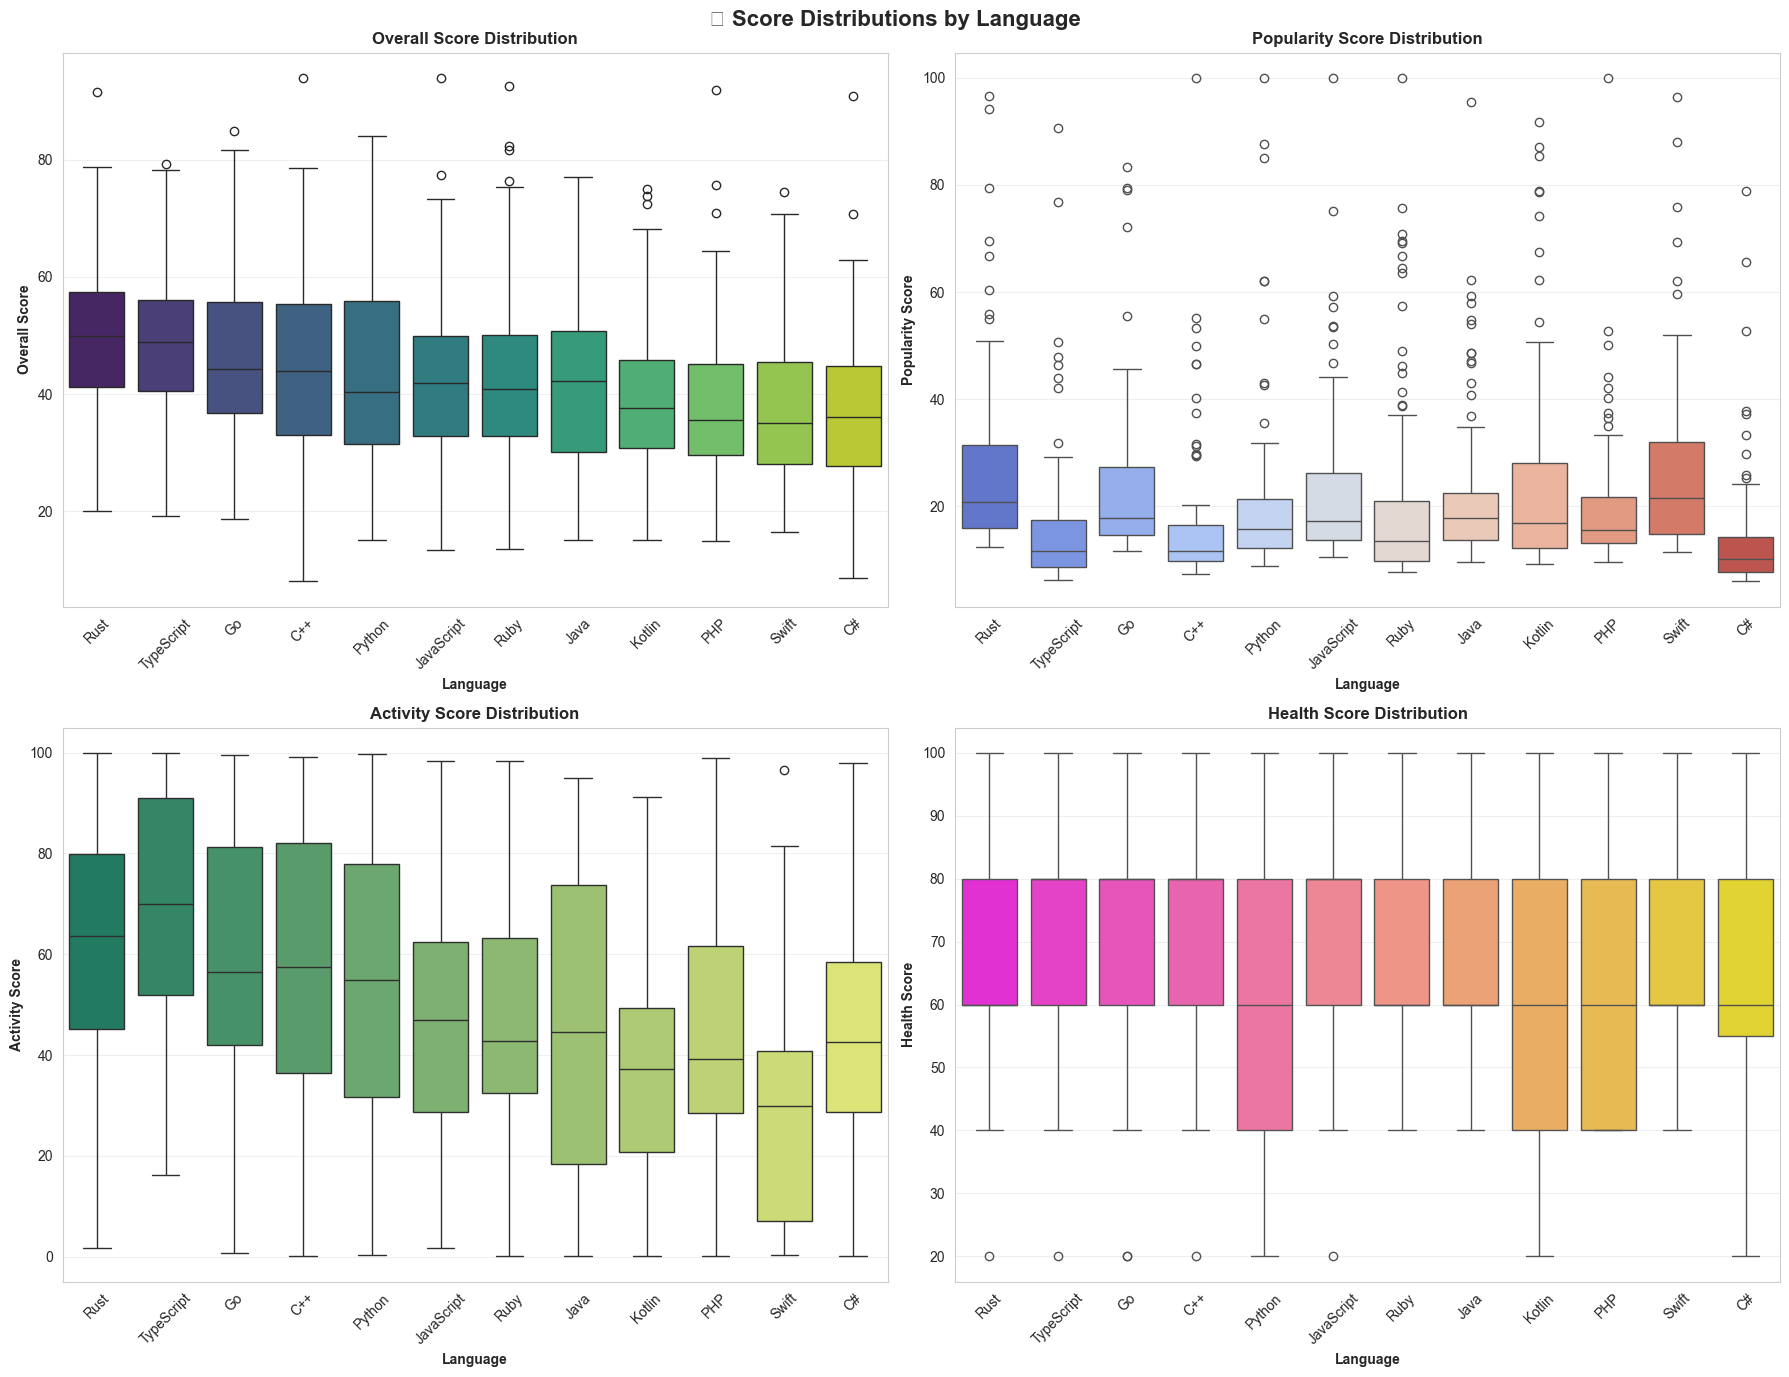


📊 Box Plot Insights:
   • Boxes show interquartile range (IQR) - middle 50% of data
   • Lines inside boxes show median values
   • Whiskers extend to 1.5× IQR
   • Points beyond whiskers are potential outliers


In [8]:
# Box plots showing score distributions by language
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('📦 Score Distributions by Language', fontsize=16, fontweight='bold')

# Sort languages by mean overall score for consistent ordering
lang_order = df.groupby('language')['overall_score'].mean().sort_values(ascending=False).index.tolist()

# Overall Score
sns.boxplot(data=df, x='language', y='overall_score', order=lang_order, 
            palette='viridis', ax=axes[0,0])
axes[0,0].set_title('Overall Score Distribution', fontweight='bold', fontsize=12)
axes[0,0].set_xlabel('Language', fontweight='bold')
axes[0,0].set_ylabel('Overall Score', fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(axis='y', alpha=0.3)

# Popularity Score
sns.boxplot(data=df, x='language', y='popularity_score', order=lang_order, 
            palette='coolwarm', ax=axes[0,1])
axes[0,1].set_title('Popularity Score Distribution', fontweight='bold', fontsize=12)
axes[0,1].set_xlabel('Language', fontweight='bold')
axes[0,1].set_ylabel('Popularity Score', fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(axis='y', alpha=0.3)

# Activity Score
sns.boxplot(data=df, x='language', y='activity_score', order=lang_order, 
            palette='summer', ax=axes[1,0])
axes[1,0].set_title('Activity Score Distribution', fontweight='bold', fontsize=12)
axes[1,0].set_xlabel('Language', fontweight='bold')
axes[1,0].set_ylabel('Activity Score', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(axis='y', alpha=0.3)

# Health Score
sns.boxplot(data=df, x='language', y='health_score', order=lang_order, 
            palette='spring', ax=axes[1,1])
axes[1,1].set_title('Health Score Distribution', fontweight='bold', fontsize=12)
axes[1,1].set_xlabel('Language', fontweight='bold')
axes[1,1].set_ylabel('Health Score', fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Box Plot Insights:")
print("   • Boxes show interquartile range (IQR) - middle 50% of data")
print("   • Lines inside boxes show median values")
print("   • Whiskers extend to 1.5× IQR")
print("   • Points beyond whiskers are potential outliers")

### 🎯 Radar Chart - Top 5 Languages

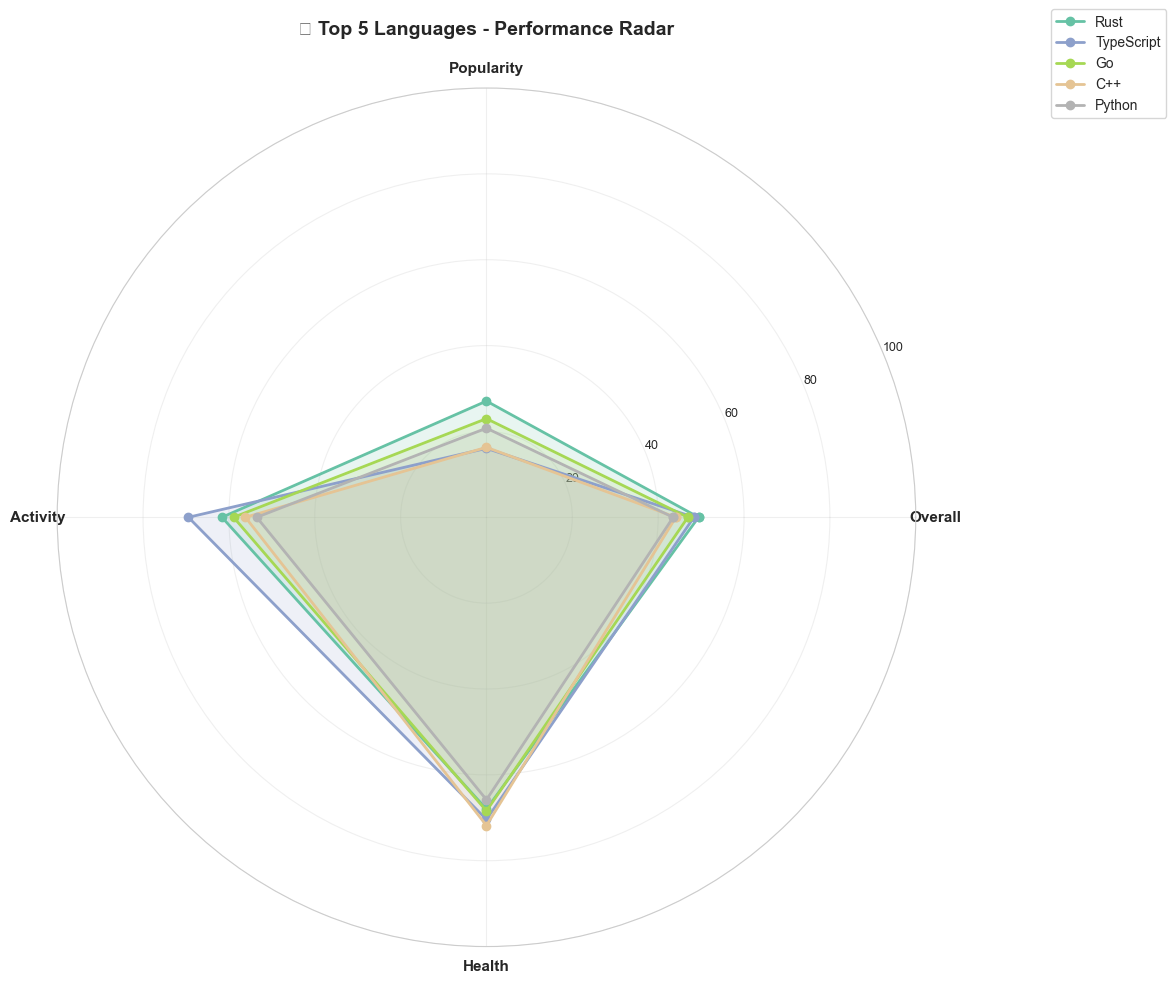


🎯 Radar Chart Analysis:
   • Larger area = stronger overall performance
   • Well-rounded languages have balanced polygons
   • Spikes indicate specific strengths


In [9]:
# Radar chart comparing top 5 languages across all metrics
top5_langs = lang_comparison.head(5)['language'].tolist()
top5_data = lang_comparison[lang_comparison['language'].isin(top5_langs)].copy()

# Prepare data for radar chart
categories = ['Overall', 'Popularity', 'Activity', 'Health']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='polar')

# Define angles for each category
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Define colors for each language
colors = plt.cm.Set2(np.linspace(0, 1, len(top5_langs)))

# Plot each language
for idx, (_, row) in enumerate(top5_data.iterrows()):
    values = [
        row['mean_overall'],
        row['mean_popularity'],
        row['mean_activity'],
        row['mean_health']
    ]
    values += values[:1]  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=2, label=row['language'], 
            color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

# Customize the chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11, fontweight='bold')
ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20', '40', '60', '80', '100'], fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_title('🎯 Top 5 Languages - Performance Radar', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)

plt.tight_layout()
plt.show()

print("\n🎯 Radar Chart Analysis:")
print("   • Larger area = stronger overall performance")
print("   • Well-rounded languages have balanced polygons")
print("   • Spikes indicate specific strengths")

### 🔥 Heatmap - Language Performance Matrix

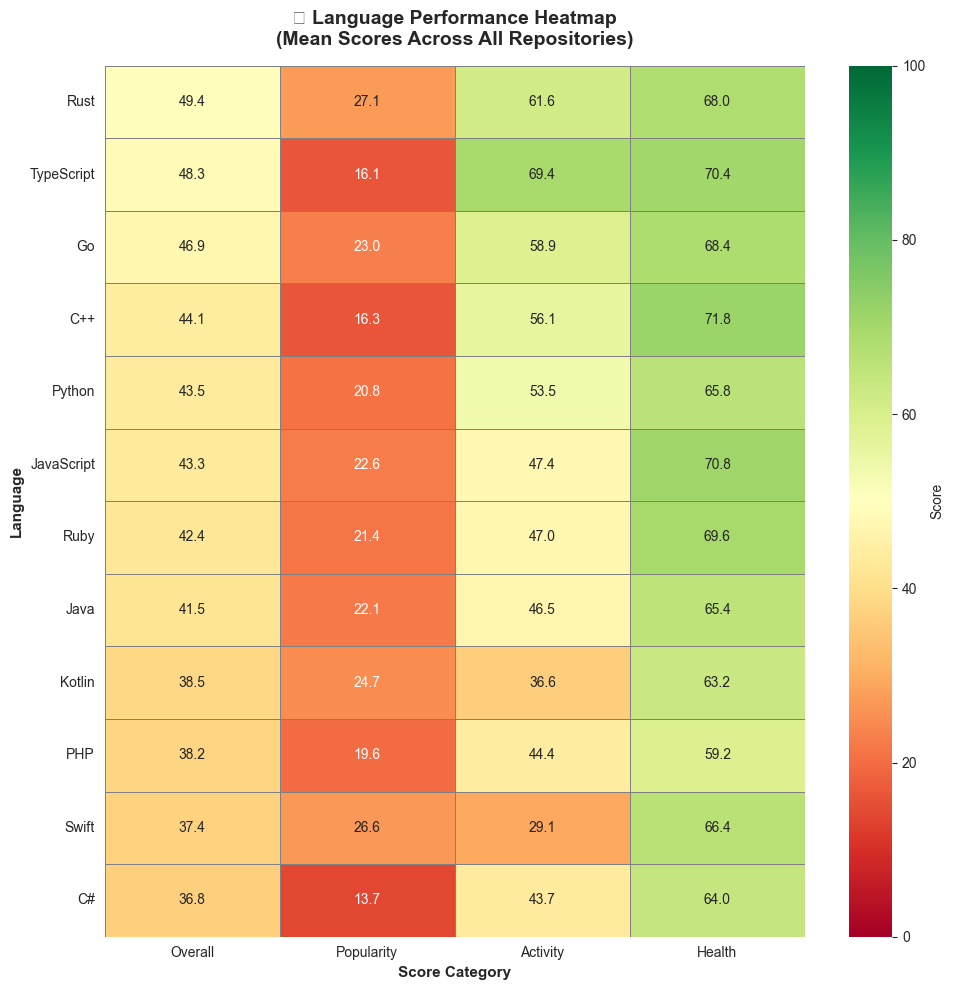


🔥 Heatmap Insights:
   • Green = High performance (80-100)
   • Yellow = Moderate performance (40-80)
   • Red = Lower performance (0-40)
   • Numbers show exact mean scores


In [10]:
# Create heatmap showing mean scores across all metrics
heatmap_data = lang_comparison.set_index('language')[
    ['mean_overall', 'mean_popularity', 'mean_activity', 'mean_health']
].sort_values('mean_overall', ascending=False)

# Rename columns for better display
heatmap_data.columns = ['Overall', 'Popularity', 'Activity', 'Health']

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn', 
            cbar_kws={'label': 'Score'},
            linewidths=0.5, linecolor='gray',
            vmin=0, vmax=100, ax=ax)

ax.set_title('🔥 Language Performance Heatmap\n(Mean Scores Across All Repositories)', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Score Category', fontweight='bold', fontsize=11)
ax.set_ylabel('Language', fontweight='bold', fontsize=11)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print("\n🔥 Heatmap Insights:")
print("   • Green = High performance (80-100)")
print("   • Yellow = Moderate performance (40-80)")
print("   • Red = Lower performance (0-40)")
print("   • Numbers show exact mean scores")

---
<a id='profiles'></a>
## 6️⃣ Language Profiles

**Individual language strengths and weaknesses analysis**

In [11]:
# Generate detailed profiles for each language
print("=" * 80)
print("📋 LANGUAGE PROFILES - STRENGTHS & WEAKNESSES ANALYSIS")
print("=" * 80)

for _, row in lang_comparison.iterrows():
    language = row['language']
    
    # Get rank indicators
    medals = {1: '🥇', 2: '🥈', 3: '🥉'}
    overall_medal = medals.get(row['overall_rank'], f"#{row['overall_rank']}")
    
    print(f"\n{'=' * 80}")
    print(f"{overall_medal} {language.upper()}")
    print(f"{'=' * 80}")
    
    # Overall performance
    print(f"\n📊 Overall Performance:")
    print(f"   Rank: {row['overall_rank']} of {len(lang_comparison)}")
    print(f"   Mean Score: {row['mean_overall']:.1f}")
    
    # Score breakdown
    print(f"\n📈 Score Breakdown:")
    print(f"   • Popularity: {row['mean_popularity']:.1f} (Rank #{row['popularity_rank']})")
    print(f"   • Activity:   {row['mean_activity']:.1f} (Rank #{row['activity_rank']})")
    print(f"   • Health:     {row['mean_health']:.1f} (Rank #{row['health_rank']})")
    
    # Identify strengths (above 70)
    strengths = []
    if row['mean_popularity'] >= 70:
        strengths.append(f"High Popularity ({row['mean_popularity']:.1f})")
    if row['mean_activity'] >= 70:
        strengths.append(f"Strong Activity ({row['mean_activity']:.1f})")
    if row['mean_health'] >= 70:
        strengths.append(f"Excellent Health ({row['mean_health']:.1f})")
    
    # Identify weaknesses (below 50)
    weaknesses = []
    if row['mean_popularity'] < 50:
        weaknesses.append(f"Lower Popularity ({row['mean_popularity']:.1f})")
    if row['mean_activity'] < 50:
        weaknesses.append(f"Limited Activity ({row['mean_activity']:.1f})")
    if row['mean_health'] < 50:
        weaknesses.append(f"Health Concerns ({row['mean_health']:.1f})")
    
    # Display strengths and weaknesses
    if strengths:
        print(f"\n💪 Key Strengths:")
        for s in strengths:
            print(f"   ✓ {s}")
    
    if weaknesses:
        print(f"\n⚠️  Areas for Improvement:")
        for w in weaknesses:
            print(f"   • {w}")
    
    # Balance assessment
    balance = row['score_balance']
    if balance < 10:
        balance_desc = "Highly Balanced"
        balance_icon = "⚖️"
    elif balance < 20:
        balance_desc = "Well Balanced"
        balance_icon = "✅"
    elif balance < 30:
        balance_desc = "Moderate Balance"
        balance_icon = "⚠️"
    else:
        balance_desc = "Specialized"
        balance_icon = "🎯"
    
    print(f"\n{balance_icon} Performance Balance: {balance_desc} (σ = {balance:.1f})")

print(f"\n{'=' * 80}")
print("Analysis complete! ✓")
print("=" * 80)

📋 LANGUAGE PROFILES - STRENGTHS & WEAKNESSES ANALYSIS

🥇 RUST

📊 Overall Performance:
   Rank: 1 of 12
   Mean Score: 49.4

📈 Score Breakdown:
   • Popularity: 27.1 (Rank #1)
   • Activity:   61.6 (Rank #2)
   • Health:     68.0 (Rank #6)

⚠️  Areas for Improvement:
   • Lower Popularity (27.1)

⚠️ Performance Balance: Moderate Balance (σ = 22.0)

🥈 TYPESCRIPT

📊 Overall Performance:
   Rank: 2 of 12
   Mean Score: 48.3

📈 Score Breakdown:
   • Popularity: 16.1 (Rank #11)
   • Activity:   69.4 (Rank #1)
   • Health:     70.4 (Rank #3)

💪 Key Strengths:
   ✓ Excellent Health (70.4)

⚠️  Areas for Improvement:
   • Lower Popularity (16.1)

🎯 Performance Balance: Specialized (σ = 31.1)

🥉 GO

📊 Overall Performance:
   Rank: 3 of 12
   Mean Score: 46.9

📈 Score Breakdown:
   • Popularity: 23.0 (Rank #4)
   • Activity:   58.9 (Rank #3)
   • Health:     68.4 (Rank #5)

⚠️  Areas for Improvement:
   • Lower Popularity (23.0)

⚠️ Performance Balance: Moderate Balance (σ = 24.0)

#4 C++

📊 Over

---
<a id='summary'></a>
## 7️⃣ Summary & Export

**Key findings and data export**

In [12]:
# Summary of key findings
print("=" * 80)
print("🎯 KEY FINDINGS - LANGUAGE COMPARISON ANALYSIS")
print("=" * 80)

# Top 3 languages
print("\n🏆 TOP 3 LANGUAGES (Overall Performance):")
for i, row in lang_comparison.head(3).iterrows():
    medals = {1: '🥇', 2: '🥈', 3: '🥉'}
    print(f"\n{medals[row['overall_rank']]} {row['language']}")
    print(f"   Overall Score: {row['mean_overall']:.1f}")
    print(f"   Popularity: {row['mean_popularity']:.1f} | Activity: {row['mean_activity']:.1f} | Health: {row['mean_health']:.1f}")

# Category leaders
print("\n\n🎖️ CATEGORY LEADERS:")
print(f"   📢 Most Popular: {lang_comparison.loc[lang_comparison['popularity_rank'] == 1, 'language'].values[0]}")
print(f"   ⚡ Most Active: {lang_comparison.loc[lang_comparison['activity_rank'] == 1, 'language'].values[0]}")
print(f"   💚 Healthiest: {lang_comparison.loc[lang_comparison['health_rank'] == 1, 'language'].values[0]}")

# Statistical significance
overall_stats = anova_results['overall_score']
print(f"\n\n📊 STATISTICAL ANALYSIS:")
print(f"   • ANOVA F-statistic: {overall_stats['f_statistic']:.2f}")
print(f"   • P-value: {overall_stats['p_value']:.2e}")
if overall_stats['significant']:
    print(f"   ✓ Language differences are STATISTICALLY SIGNIFICANT (p < 0.05)")
else:
    print(f"   ✗ Language differences are NOT statistically significant (p ≥ 0.05)")

# Balance insights
most_balanced = lang_comparison.loc[lang_comparison['score_balance'].idxmin()]
most_specialized = lang_comparison.loc[lang_comparison['score_balance'].idxmax()]
print(f"\n\n⚖️ BALANCE ANALYSIS:")
print(f"   Most Balanced: {most_balanced['language']} (σ = {most_balanced['score_balance']:.1f})")
print(f"   Most Specialized: {most_specialized['language']} (σ = {most_specialized['score_balance']:.1f})")

# Sample size reminder
print(f"\n\n📋 DATA SUMMARY:")
print(f"   Total Languages Analyzed: {len(lang_comparison)}")
print(f"   Repositories per Language: {df.groupby('language').size().iloc[0]}")
print(f"   Total Repositories: {len(df):,}")

print("\n" + "=" * 80)
print("Analysis Complete! ✓")
print("=" * 80)

🎯 KEY FINDINGS - LANGUAGE COMPARISON ANALYSIS

🏆 TOP 3 LANGUAGES (Overall Performance):

🥇 Rust
   Overall Score: 49.4
   Popularity: 27.1 | Activity: 61.6 | Health: 68.0

🥈 TypeScript
   Overall Score: 48.3
   Popularity: 16.1 | Activity: 69.4 | Health: 70.4

🥉 Go
   Overall Score: 46.9
   Popularity: 23.0 | Activity: 58.9 | Health: 68.4


🎖️ CATEGORY LEADERS:
   📢 Most Popular: Rust
   ⚡ Most Active: TypeScript
   💚 Healthiest: C++


📊 STATISTICAL ANALYSIS:
   • ANOVA F-statistic: 9.46
   • P-value: 1.67e-16
   ✓ Language differences are STATISTICALLY SIGNIFICANT (p < 0.05)


⚖️ BALANCE ANALYSIS:
   Most Balanced: Kotlin (σ = 19.7)
   Most Specialized: TypeScript (σ = 31.1)


📋 DATA SUMMARY:
   Total Languages Analyzed: 12
   Repositories per Language: 100
   Total Repositories: 1,200

Analysis Complete! ✓


In [13]:
# Export comparison summary to CSV
output_path = Path('../data/derived/language_comparison_summary.csv')
output_path.parent.mkdir(parents=True, exist_ok=True)
lang_comparison.to_csv(output_path, index=False)
print(f"✅ Language comparison summary exported to: {output_path}")
print(f"\n📊 Exported Data Includes:")
print("   • Language rankings (overall, popularity, activity, health)")
print("   • Mean scores across all metrics")
print("   • Score balance (standard deviation)")
print("   • Repository counts per language")
print(f"\n💾 File saved successfully!")
print(f"   Location: {output_path}")
print(f"   Rows: {len(lang_comparison)}")
print(f"   Columns: {len(lang_comparison.columns)}")

✅ Language comparison summary exported to: ..\data\derived\language_comparison_summary.csv

📊 Exported Data Includes:
   • Language rankings (overall, popularity, activity, health)
   • Mean scores across all metrics
   • Score balance (standard deviation)
   • Repository counts per language

💾 File saved successfully!
   Location: ..\data\derived\language_comparison_summary.csv
   Rows: 12
   Columns: 11


---
## 🎓 Next Steps

Ready to dive deeper? Continue your analysis with:

| Notebook | Focus Area |
|----------|-----------|
| **03_correlation_analysis.ipynb** | Explore relationships between metrics and discover success factors |
| **04_advanced_visualizations.ipynb** | Create interactive dashboards and 3D visualizations |

---

**Questions or insights?** Review the detailed language profiles above or check the exported CSV file! 📊